<a href="https://colab.research.google.com/github/Nishant38/Visualization/blob/main/graphVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import requests
import gzip
import io

In [ ]:
%matplotlib inline

In [ ]:
url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
response = requests.get(url)

if response.status_code != 200:
    print("Failed to fetch data. Status code:", response.status_code)
else:
    print("Data fetched successfully!")


Data fetched successfully!


In [ ]:
with gzip.GzipFile(fileobj = io.BytesIO(response.content), mode='rb') as file :
    text_file = io.TextIOWrapper(file, encoding = 'utf-8')
    G = nx.read_edgelist(text_file)

In [ ]:
layouts = {
    "Spring Layout": nx.spring_layout(G, k=0.3, seed=42),  # Reduce overlap
    "Circular Layout": nx.circular_layout(G),
    "Fruchterman-Reingold Layout": nx.fruchterman_reingold_layout(G, k=0.1, seed=42)
}

In [ ]:
node_degrees = [G.degree(n) for n in G.nodes()]
max_degree = max(node_degrees)
node_colors = [deg / max(node_degrees) for deg in node_degrees]

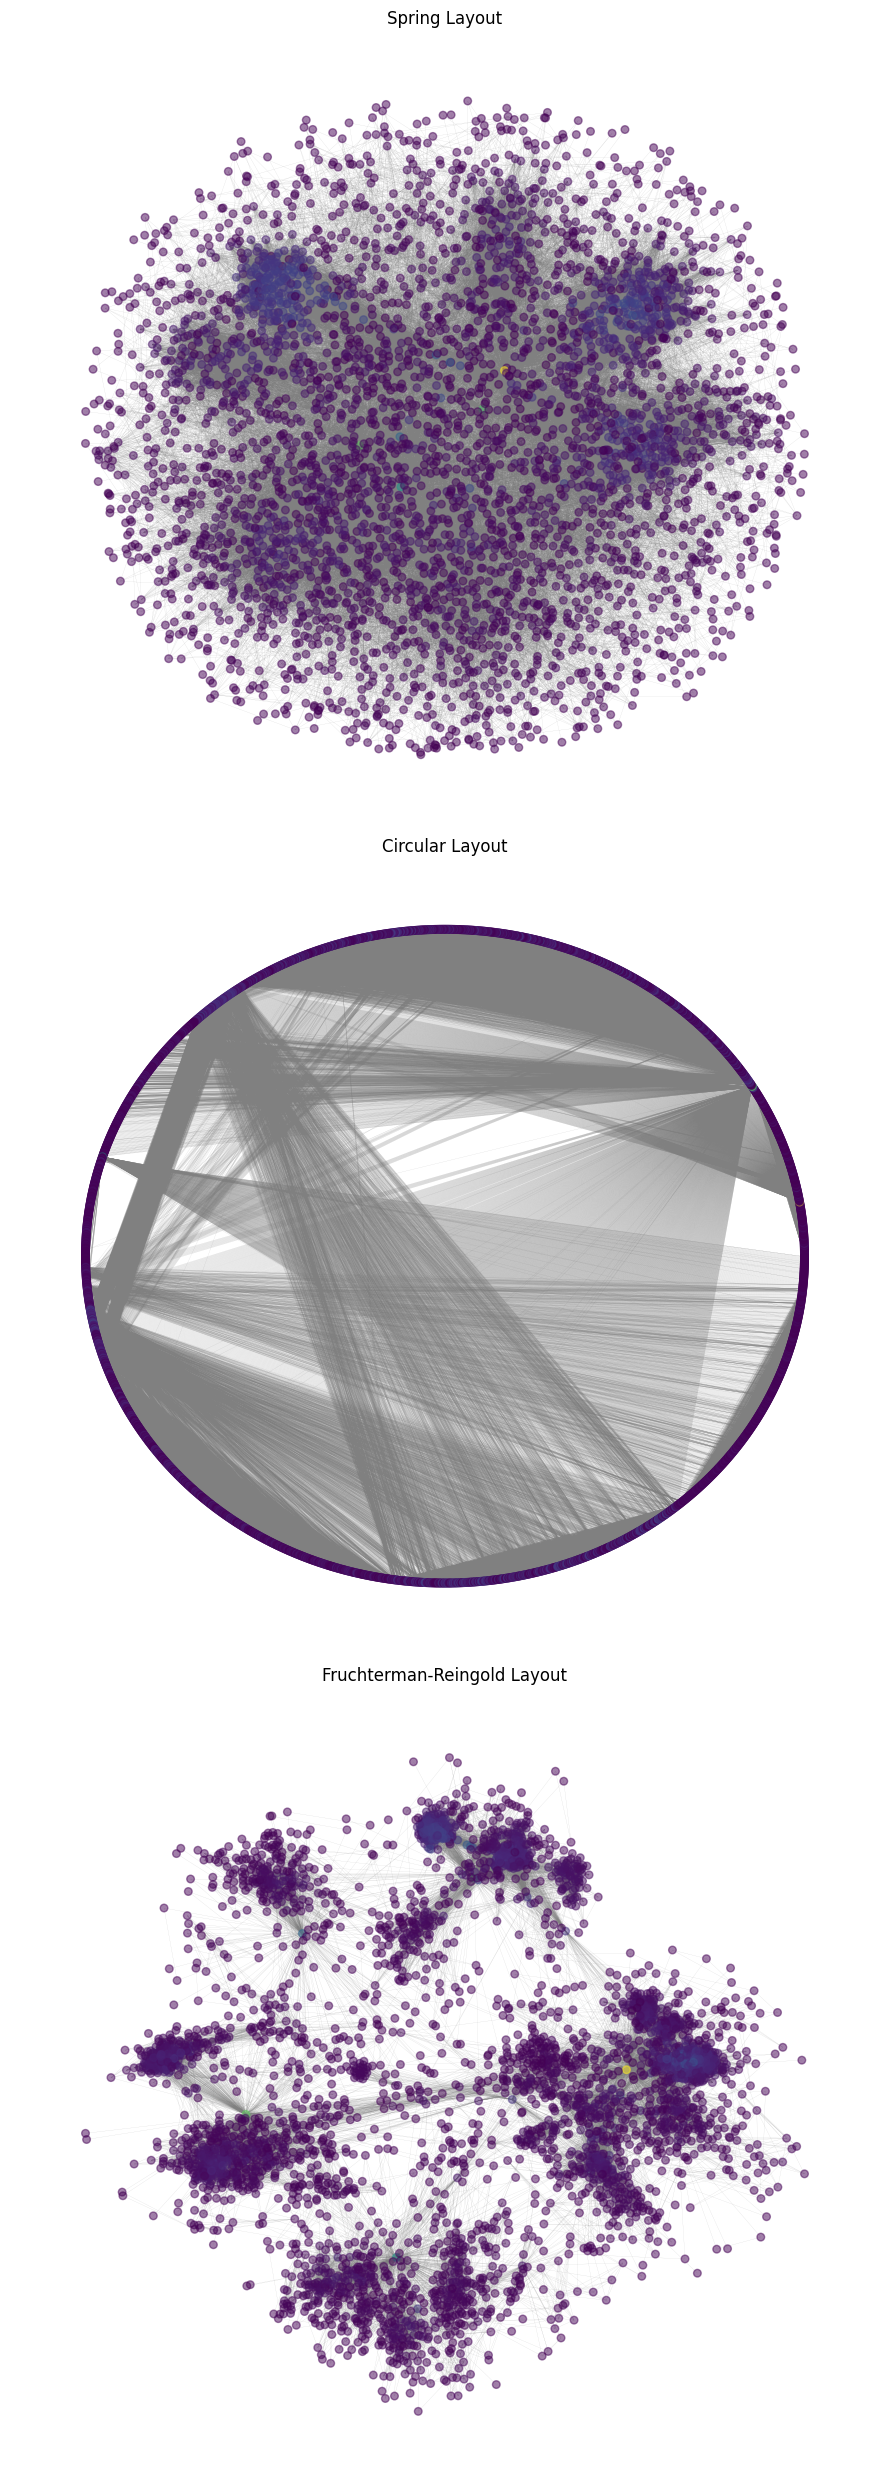

In [ ]:

fig, axes = plt.subplots(len(layouts), 1, figsize=(9, 25))
for ax, (layout_name, pos) in zip(axes, layouts.items()):
    ax.set_title(layout_name)
    ax.set_xticks([])  # Hide axis ticks
    ax.set_yticks([])

    nx.draw(
        G, pos, ax=ax,
        node_size=30,  # Slightly smaller nodes to reduce clutter
        node_color=node_colors, cmap=plt.cm.viridis,  # Improved color difference
        edge_color="gray", width=0.1, alpha=0.5
    )


plt.tight_layout()
plt.show(block=True)